<a href="https://colab.research.google.com/github/myller-silva/SO-trabalho-03-paginacao/blob/main/evaluate_aging_algorithm_with_varying_bits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libs

In [40]:
from collections import deque
import random
import math
import matplotlib.pyplot as plt
import numpy as np

# Algoritmos

In [41]:
def fifo(referencias_as_paginas, qtd_molduras):
  molduras = []
  faltas_de_pagina = 0

  for pagina in referencias_as_paginas:
    if pagina not in molduras:
      faltas_de_pagina += 1
      if len(molduras) == qtd_molduras:
        molduras.pop(0)
      molduras.append(pagina)

  return faltas_de_pagina


def aging_bits(referencias_as_paginas, qtd_molduras, qtd_bits=None):
    if qtd_bits is None:
      qtd_bits = qtd_molduras
    molduras = []
    idade_paginas = []
    faltas_de_pagina = 0

    for pagina in referencias_as_paginas:
        if pagina in molduras:
            indice_pagina = molduras.index(pagina)
            idade_paginas[indice_pagina] >>= 1
            idade_paginas[indice_pagina] |= 1 << (qtd_bits - 1)
        else:
            faltas_de_pagina += 1
            idade_paginas = [idade >> 1 for idade in idade_paginas]
            if len(molduras) == qtd_molduras:
                indice_pagina_a_remover = idade_paginas.index(min(idade_paginas))
                molduras[indice_pagina_a_remover] = pagina
                idade_paginas[indice_pagina_a_remover] = 1 << (qtd_bits - 1)
            else:
                molduras.append(pagina)
                idade_paginas.append(1 << (qtd_bits - 1))
    return faltas_de_pagina


# FIFO vs Aging

In [42]:
def experimento_fifo_vs_aging(qtd_referencias, qtd_paginas, max_molduras = 64):
    paginas  = [i for i in range(qtd_paginas)]
    referencias_as_paginas = random.choices(paginas, k=qtd_referencias)
    # tamanho_molduras = [2**i for i in range( int(math.log2(max_molduras)) + 1) ] # se max_molduras == 16, entao [2^0, 2^1 , 2^2, 2^3]
    tamanho_molduras = [i for i in range(1, max_molduras+1)]
    fifo_acumulate = []
    aging_acumulate = []
    # print('molduras: ', tamanho_molduras)

    for tamanho_moldura in tamanho_molduras:
        fifo_acumulate.append(fifo(referencias_as_paginas, tamanho_moldura))
        aging_acumulate.append(aging_bits(referencias_as_paginas, tamanho_moldura))

    return fifo_acumulate, aging_acumulate, tamanho_molduras


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
[984, 968, 955, 939, 920, 907, 893, 874, 855, 840, 828, 817, 799, 767, 749, 739, 730, 714, 705, 688, 675, 656, 647, 639, 620, 599, 588, 583, 570, 559, 539, 523]
[984, 969, 953, 937, 921, 906, 891, 878, 859, 845, 825, 814, 791, 775, 751, 737, 721, 711, 698, 687, 677, 666, 654, 639, 630, 620, 611, 590, 579, 554, 537, 521]


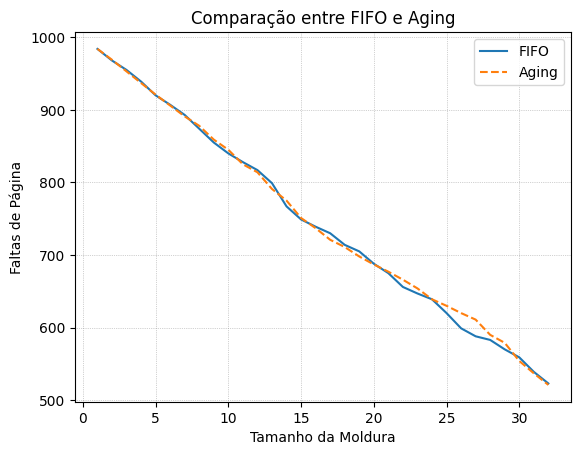

In [43]:
fifo_array, aging_array, tamanho_molduras = experimento_fifo_vs_aging(qtd_referencias = 1000, qtd_paginas = 64, max_molduras=32)
print(tamanho_molduras)
print(fifo_array)
print(aging_array)

# plotagem
plt.plot(tamanho_molduras, fifo_array, label='FIFO')
plt.plot(tamanho_molduras, aging_array, label='Aging', linestyle='--')
plt.grid(True, linestyle=':', color='gray', alpha=0.7, linewidth=0.5)
plt.xlabel('Tamanho da Moldura')
# plt.xticks(tamanho_molduras)
plt.ylabel('Faltas de Página')
plt.title('Comparação entre FIFO e Aging')
plt.legend()
plt.show()


# Gráfico Médio


In [ ]:
num_experiements = 100
qtd_paginas = 64
qtd_referencias = 1000
max_molduras = 32

paginas = np.arange(qtd_paginas)
m_r_fifo = np.zeros((num_experiements, max_molduras))
m_r_aging = np.zeros((num_experiements, max_molduras))

for i in range(num_experiements):
    print(f"\ri: {i}", end='')
    for j in range(1, max_molduras+1):
        referencias_as_paginas = random.choices(paginas, k=qtd_referencias)
        fifo_array, aging_array, tamanho_molduras = experimento_fifo_vs_aging(qtd_referencias = qtd_referencias, qtd_paginas = qtd_paginas, max_molduras=max_molduras)
        m_r_fifo[i, j-1] = fifo_array[j-1]
        m_r_aging[i, j-1] = aging_array[j-1]



i: 66

In [ ]:
# Calcular as médias e desvios padrão
fifo_cor = "red"
aging_cor = "green"

medias_fifo = np.mean(m_r_fifo, axis=0)
desvios_padrao_fifo = np.std(m_r_fifo, axis=0)

medias_aging = np.mean(m_r_aging, axis=0)
desvios_padrao_aging = np.std(m_r_aging, axis=0)

print(f"medias_fifo: {medias_fifo}")
print(f"desvios_padrao_fifo: {desvios_padrao_fifo}")

print(f"medias_aging: {medias_aging}")
print(f"desvios_padrao_aging: {desvios_padrao_aging}")

# Quantidade de molduras
molduras = np.arange(1, max_molduras + 1)

# 1. Gráfico separado para FIFO
# plt.figure(figsize=(10, 6))
plt.plot(molduras, medias_fifo,
         marker='o',
         color=fifo_cor, label='FIFO - Média das Faltas')
plt.fill_between(molduras, medias_fifo - desvios_padrao_fifo, medias_fifo + desvios_padrao_fifo,
                 color=fifo_cor, alpha=0.2, label='FIFO - Desvio Padrão')
plt.title('FIFO - Média e Desvio Padrão das Faltas de Páginas por Moldura')
plt.xlabel('Quantidade de Molduras')
plt.ylabel('Faltas de Páginas')
plt.legend()
plt.grid(True)
plt.show()

# 2. Gráfico separado para Aging
# plt.figure(figsize=(10, 6))
plt.plot(molduras, medias_aging,
         marker='o',
         color=aging_cor, label='Aging - Média das Faltas')
plt.fill_between(molduras, medias_aging - desvios_padrao_aging, medias_aging + desvios_padrao_aging,
                 color=aging_cor, alpha=0.2, label='Aging - Desvio Padrão')
plt.title('Aging - Média e Desvio Padrão das Faltas de Páginas por Moldura')
plt.xlabel('Quantidade de Molduras')
plt.ylabel('Faltas de Páginas')
plt.legend()
plt.grid(True)
plt.show()

# 3. Gráfico combinando FIFO e Aging
# plt.figure(figsize=(10, 6))
plt.plot(molduras, medias_fifo,
         marker='o',
         color=fifo_cor, label='FIFO - Média das Faltas')
plt.plot(molduras, medias_aging,
         marker='o',
         color=aging_cor, label='Aging - Média das Faltas')
plt.fill_between(molduras, medias_fifo - desvios_padrao_fifo, medias_fifo + desvios_padrao_fifo,
                 color=fifo_cor, alpha=0.2, label='FIFO - Desvio Padrão')
plt.fill_between(molduras, medias_aging - desvios_padrao_aging, medias_aging + desvios_padrao_aging,
                 color=aging_cor, alpha=0.2, label='Aging - Desvio Padrão')
plt.title('Comparação: FIFO e Aging - Média e Desvio Padrão das Faltas de Páginas por Moldura')
plt.xlabel('Quantidade de Molduras')
plt.ylabel('Faltas de Páginas')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# plotar todas os fifos
for i in m_r_fifo:
    plt.plot(molduras, i,
            #  marker='o'
             )
plt.show()

# plotar todas os agings
for i in m_r_aging:
    plt.plot(molduras, i,
            #  marker='o'
             )
plt.show()

# Aging variando quantidade de bits para os contadores, usando as mesmas referências

In [ ]:
def evaluate_aging_algorithm_with_varying_bits(referencias_as_paginas, qtd_molduras, bits_range):
    resultados = []
    for qtd_bits in bits_range:
        faltas = aging_bits(referencias_as_paginas, qtd_molduras, qtd_bits)
        resultados.append(faltas)
    return resultados


In [ ]:
qtd_referencias = 1000
qtd_paginas = 64
qtd_molduras = 32
max_bits = 64+1

bits_range = [i for i in range(2, max_bits)]
paginas = [i for i in range(qtd_paginas)]

referencias_as_paginas = random.choices(paginas, k=qtd_referencias)
resultados = evaluate_aging_algorithm_with_varying_bits(referencias_as_paginas, qtd_molduras, bits_range)

In [ ]:
print(dict(zip(bits_range, resultados)))
plt.plot(
    bits_range,
    resultados,
    # marker='o'
    )
plt.xlabel('Número de Bits')
plt.ylabel('Faltas de Página')
plt.title('Aging variando quantidade de bits dos contadores')
plt.grid(True, linestyle='--', color='gray', alpha=0.7, linewidth=0.5)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir o número de elementos
n = 64

# Gerar um vetor com uma distribuição gaussiana
x = np.linspace(-3, 3, n)  # Cria um vetor de -3 a 3 com 64 pontos
mean = 0
std_dev = 1
gaussian_curve = np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

# Normalizar para o intervalo [0, 1]
gaussian_curve = (gaussian_curve - np.min(gaussian_curve)) / (np.max(gaussian_curve) - np.min(gaussian_curve))

# Plotar o gráfico da curva gaussiana
plt.plot(gaussian_curve, label='Distribuição Gaussiana Normalizada')
plt.xlabel('Índice')
plt.ylabel('Valor Normalizado')
plt.title('Curva Gaussiana Normalizada')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar o vetor resultante
print("Vetor com distribuição gaussiana normalizada:", gaussian_curve)
print(gaussian_curve.shape)


In [ ]:
# referencias_as_paginas = random.choices(paginas, k=qtd_referencias)
referencias_as_paginas = random.choices(paginas, weights=gaussian_curve, k=qtd_referencias)

In [ ]:
# Contar as ocorrências de cada valor
unique, counts = np.unique(referencias_as_paginas, return_counts=True)

# Plotar o gráfico de barras
plt.bar(unique, counts)
plt.xlabel('Páginas')
plt.ylabel('Quantidade de Ocorrências')
plt.title('Distribuição de Frequência das Referências às Páginas')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# Mostrar o vetor resultante
print("Vetor de referências:", referencias_as_paginas)

In [ ]:
print(dict(zip(bits_range, resultados)))
resultados = evaluate_aging_algorithm_with_varying_bits(referencias_as_paginas, qtd_molduras, bits_range)
plt.plot(
    bits_range,
    resultados,
    # marker='o'
    )
plt.xlabel('Número de Bits')
plt.ylabel('Faltas de Página')
plt.title('Aging variando quantidade de bits dos contadores')
plt.grid(True, linestyle='--', color='gray', alpha=0.7, linewidth=0.5)
plt.show()

In [ ]:
# aging vs fifo com conjunto de trabalhos

qtd_paginas = 64
qtd_referencias = 1000
max_molduras = 32

tamanho_molduras = np.arange(1, max_molduras + 1)

fifo_array = []
aging_array = []

for tamanho_moldura in tamanho_molduras:
    fifo_array.append(fifo(referencias_as_paginas, tamanho_moldura))
    aging_array.append(aging_bits(referencias_as_paginas, tamanho_moldura))



In [ ]:
print(tamanho_molduras)
print(fifo_array)
print(aging_array)

# plotagem
plt.plot(tamanho_molduras, fifo_array, label='FIFO')
plt.plot(tamanho_molduras, aging_array, label='Aging', linestyle='--')
plt.grid(True, linestyle=':', color='gray', alpha=0.7, linewidth=0.5)
plt.xlabel('Tamanho da Moldura')
# plt.xticks(tamanho_molduras)
plt.ylabel('Faltas de Página')
plt.title('Comparação entre FIFO e Aging')
plt.legend()
plt.show()
